In [1]:
# 911 Calls Project

In [2]:
# For this project we will be analyzing some 911 call data from 
#[Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

In [3]:
# Import numpy and pandas 
import numpy as np
import pandas as pd

In [4]:
# Import visualization libraries and set %matplotlib inline. And add grid globally
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.grid'] = True

In [5]:
# To import the data Read in the csv file as a dataframe called df
df = pd.read_csv('911.csv')

In [6]:
# First cheking the data using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
# Cheking data first rows to see what are the entries look like
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
# The top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
# The top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
# Count of unique codes in 'title' column
df['title'].nunique()

110

In [11]:
# In title column we will split first part of the entry by using split(:) beacuse this is where we have reason of call and these are EMS, Fire, and Traffic.
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

In [12]:
# Checking new column in our data
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [13]:
# Most common Reason for a 911 call based off 'Reason' column
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

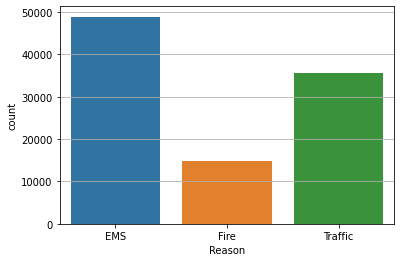

In [14]:
# Countplot of 911 calls by Reason by using Seaborn
sns.countplot(x='Reason',data=df)

In [15]:
# In order to make use time info first cheking column type
type(df['timeStamp'].iloc[0])

str

In [16]:
# Converting it to proper data type with using pd.to_datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# We can now grab specific attributes from a Datetime object by calling them
time = df['timeStamp'].iloc[0]
time.hour

17

In [18]:
# Creating 3 new columns called Hour, Month, and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [19]:
# Day names are in integer using map() and dmap dictionary we will name them
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


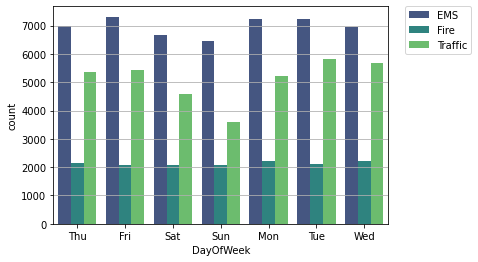

In [20]:
# Countplot of the Day of Week column 
sns.countplot(x='DayOfWeek',data=df,hue='Reason',palette='viridis')
# To locate the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

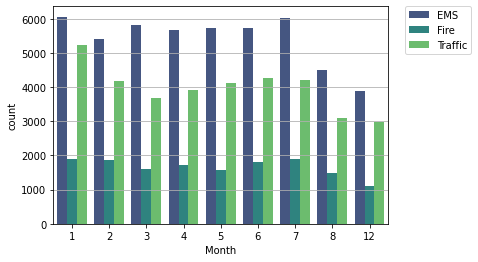

In [21]:
# Countplot of the Day of Month column 
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
# To locate the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [22]:
# In the previous plot 9-10-11 Months are missing.
# We will create a simple line plot to fill this missing months.

In [23]:
# Creating a gropuby object called byMonth with using count() for aggregation
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


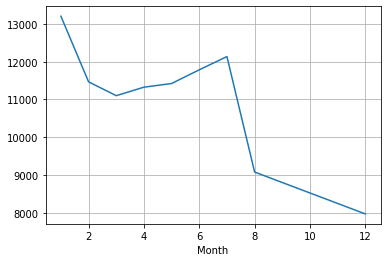

In [24]:
# Line plot off of the dataframe indicating the count of calls per month
byMonth['lat'].plot()

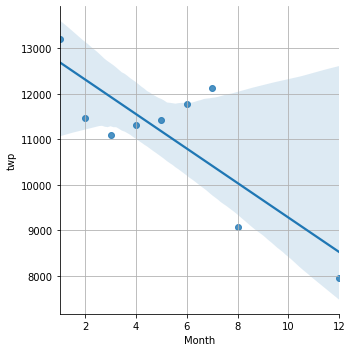

In [25]:
# lmplot() to create a linear fit on the number of calls per month.
# There is no cloumn as Month we will need to reset_index() to use it.
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [26]:
# Creating 'Date' column from 'timeStamp' column with using date() method
t = df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda t : t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


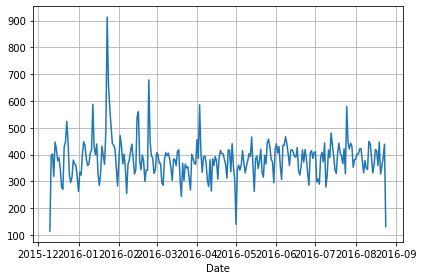

In [27]:
# Groupby 'Date' column with count() and choose any column to create a line plot
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

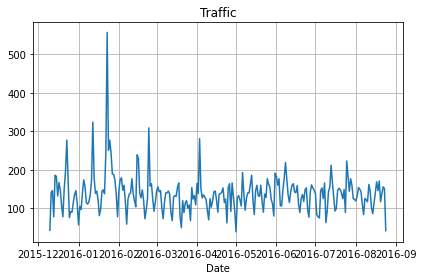

In [28]:
# Recreate the same plot with using conditional selection to show it only calls for Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

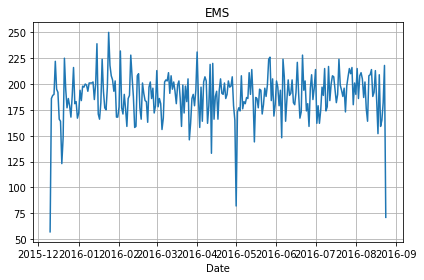

In [29]:
# Recreate the same plot with using conditional selection to show it only calls for EMS
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

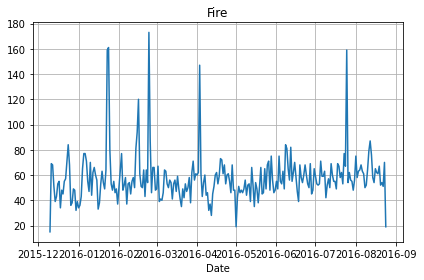

In [30]:
# Recreate the same plot with using conditional selection to show it only calls for Fire
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [31]:
# Creating heatmaps with seaborn and our data.
# We will need to restructure the dataframe 
# so that the columns become the Hours and the Index becomes the Day of the Week
dayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


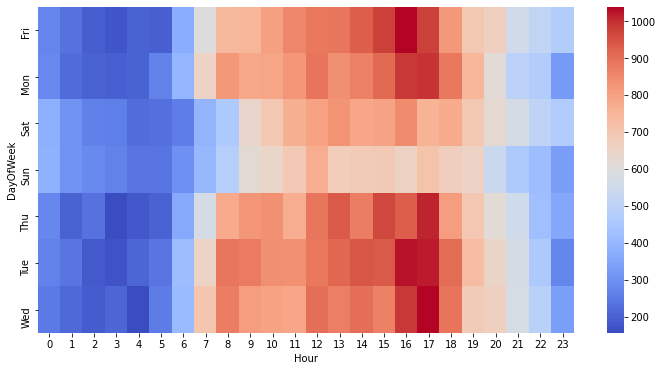

In [37]:
#HeatMap using this new DataFrame
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

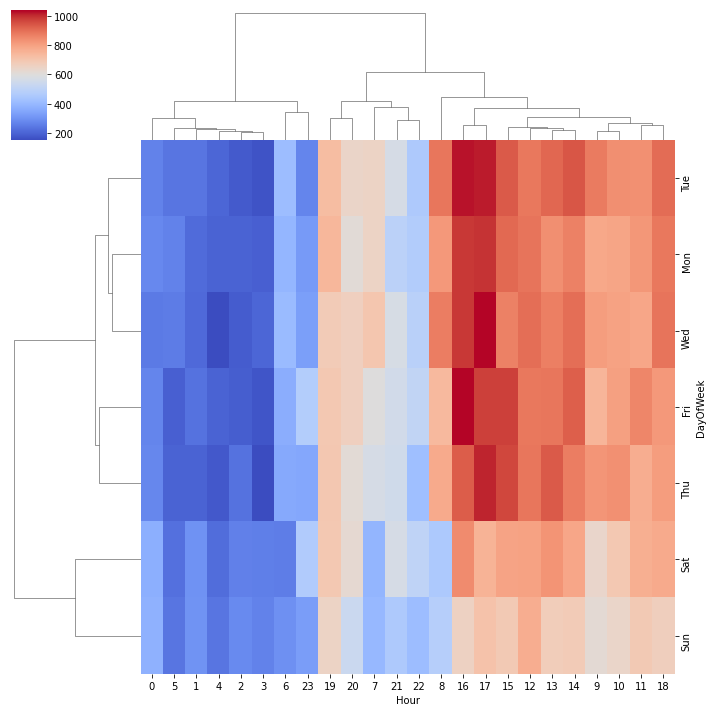

In [38]:
# Clustermap using this DataFrame
sns.clustermap(dayHour,cmap='coolwarm')

In [34]:
# We will repeat the same plots for Month column
#
dayMonth = df.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


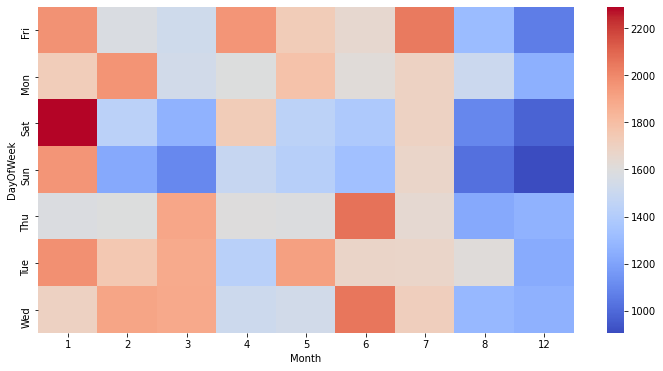

In [39]:
#HeatMap using this new DataFrame
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

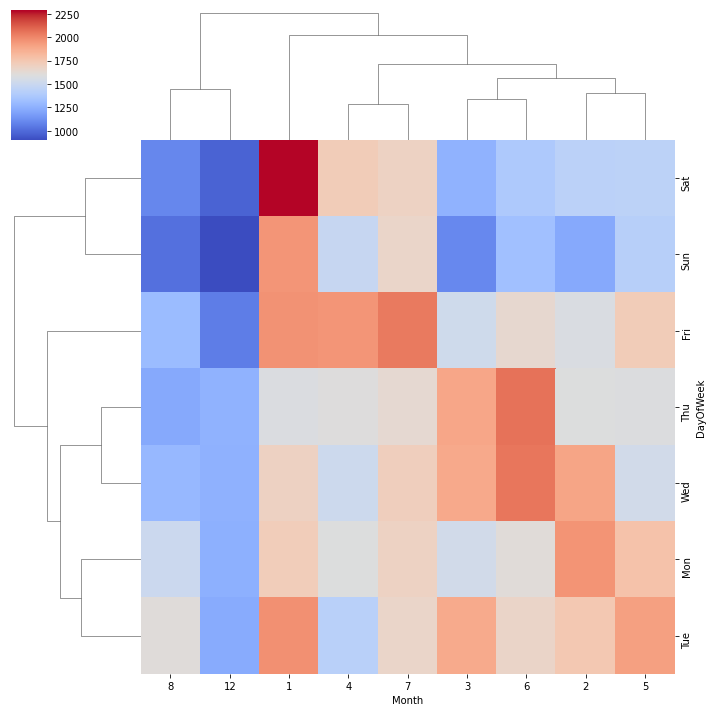

In [40]:
# Clustermap using this DataFrame
sns.clustermap(dayMonth,cmap='coolwarm')